In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [58]:

X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

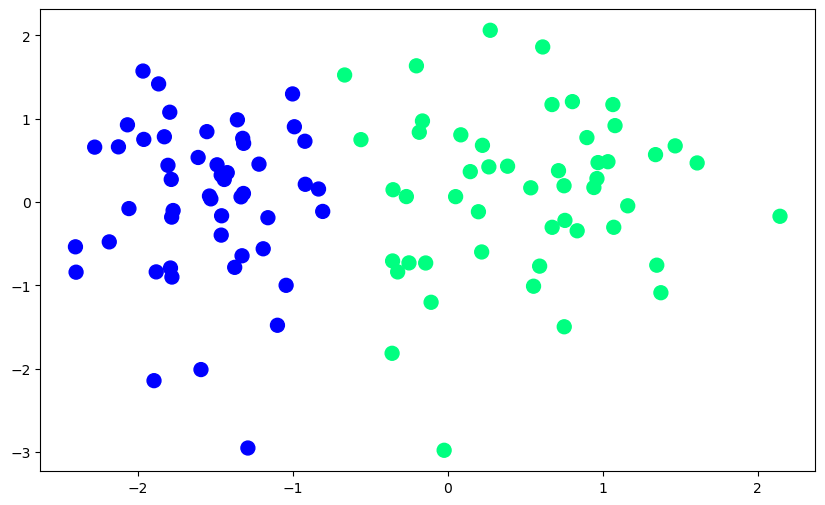

In [59]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [60]:
from sklearn.linear_model import Perceptron

In [61]:
model1 = Perceptron()

In [62]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [63]:
model1.fit(X_train,y_train)

Perceptron()

In [64]:
print(model1.coef_ , model1.intercept_)

[[ 5.60799936 -0.04416522]] [4.]


In [65]:
pred1 = model1.predict(X_test)

In [66]:
m = -1 * model1.coef_[0][0] / model1.coef_[0][1]
b = -1 * model1.intercept_ / model1.coef_[0][1]

In [67]:
x_input = np.linspace(-2, 2 , 100)
y_input = m * x_input + b

(-3.0, 2.0)

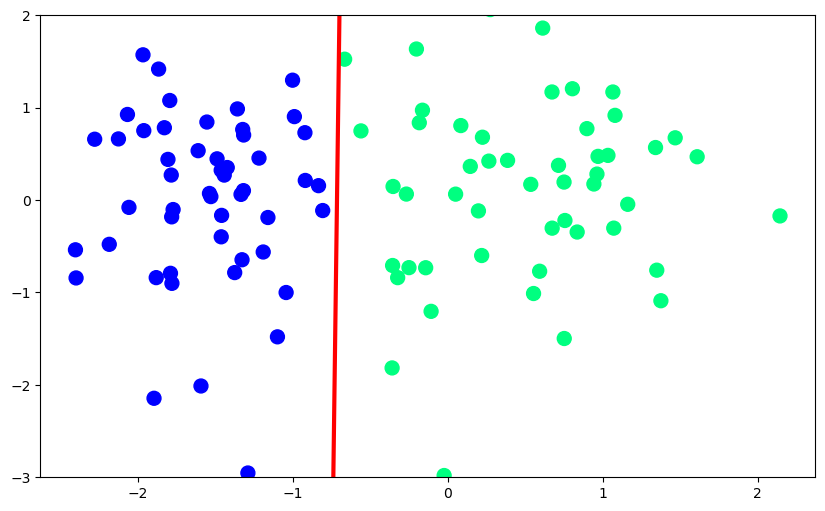

In [68]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

### Perceptron From Scratch 

In [113]:
class perceptron:
    def __init__(self,alpha,epoch):
        self.alpha = alpha
        self.epoch = epoch
        self.weights = None
    def fit(self,X_train , y_train):
        
        X_train = np.hstack((np.ones((X_train.shape[0] , 1)) , X_train))
        self.weights = np.ones(X_train.shape[1])
        for i in range(self.epoch):
            index = np.random.randint(0 , X_train.shape[0])
            y_hat = 1 if np.dot(X_train[index] , self.weights) >= 0 else 0
            self.weights = self.weights + self.alpha * (y_train[index] - y_hat) * X_train[index] 
    def predict(self,X_test):
        X_test = np.hstack((np.ones((X_test.shape[0] , 1)) , X_test))
        result = np.dot(X_test , self.weights) 
        return np.where(result >= 0 , 1 , 0)
         
            

In [122]:
model1 = perceptron(0.05 , 1000)

In [123]:
model1.fit(X_train , y_train)

In [124]:
model1.weights

array([0.95      , 1.32036546, 0.16773775])

In [125]:
pred1 = model1.predict(X_test)

In [118]:
pred1

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [119]:
from sklearn.metrics import accuracy_score

In [126]:
accuracy_score(y_test , pred1)

1.0

In [127]:
y_test

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1])